In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import sys
import scipy
import numpy as np
import sklearn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.utils import resample

## Activities

In [2]:
dataset_WGS_Other_act = pd.read_csv('./project_data/activities/WGS/WGS_Other.activities.csv')
print(dataset_WGS_Other_act.shape)

(1865, 68)


In [3]:
dataset_WGS_PCAWG_act = pd.read_csv('./project_data/activities/WGS/WGS_PCAWG.activities.csv')
print(dataset_WGS_PCAWG_act.shape)

(2780, 68)


In [4]:
dataset_WES_Other_act = pd.read_csv('./project_data/activities/WES/WES_Other.activities.csv')
print(dataset_WES_Other_act.shape)

(9691, 68)


In [5]:
dataset_WES_TCGA_act = pd.read_csv('./project_data/activities/WES/WES_TCGA.activities.csv')
print(dataset_WES_TCGA_act.shape)

(9493, 68)


## Catalogs

In [6]:
nonPCAWG_wgs_mut = pd.read_csv('./project_data/catalogs/WGS/WGS_Other.96.csv')

In [7]:
PCAWG_wgs_mut = pd.read_csv('./project_data/catalogs/WGS/WGS_PCAWG.96.csv')

In [8]:
dataset_WES_Other_act = pd.read_csv('./project_data/catalogs/WES/WES_Other.96.csv')
print(dataset_WES_Other_act.shape)

(96, 9693)


In [9]:
dataset_WES_TCGA_act = pd.read_csv('./project_data/catalogs/WES/WES_TCGA.96.csv')
print(dataset_WES_TCGA_act.shape)

(96, 9495)


In [10]:
### Aggregate mutation type and trinucleotides to one column
PCAWG_wgs_mut['tri_mut'] = PCAWG_wgs_mut[['Mutation type', 'Trinucleotide']].agg('_'.join, axis=1)
# 
nonPCAWG_wgs_mut['tri_mut'] = nonPCAWG_wgs_mut[['Mutation type', 'Trinucleotide']].agg('_'.join, axis=1)
# Concatenate both mutation count data sets
#total_wgs_mut = pd.concat([PCAWG_wgs_mut, nonPCAWG_wgs_mut], axis=1)
#total_wgs_mut.shape
#(96, 4651)
### Get cancer types
new_list = [re.sub(r'\:.*', '', i) for i in PCAWG_wgs_mut.columns]
# Transpose
PCAWG_wgs_mut_T = PCAWG_wgs_mut.T
# Rename columns
PCAWG_wgs_mut_T.columns = PCAWG_wgs_mut["tri_mut"]
PCAWG_wgs_mut_T["label"] = new_list[:]
PCAWG_wgs_mut_T = PCAWG_wgs_mut_T.iloc[2:,:] # we don't need to first 2 rows

In [11]:
PCAWG_wgs_mut_T

tri_mut,C>A_ACA,C>A_ACC,C>A_ACG,C>A_ACT,C>A_CCA,C>A_CCC,C>A_CCG,C>A_CCT,C>A_GCA,C>A_GCC,...,T>G_CTT,T>G_GTA,T>G_GTC,T>G_GTG,T>G_GTT,T>G_TTA,T>G_TTC,T>G_TTG,T>G_TTT,label
Biliary-AdenoCA::SP117655,269,148,25,154,215,148,27,180,165,76,...,268,19,17,43,89,83,48,63,197,Biliary-AdenoCA
Biliary-AdenoCA::SP117556,114,56,13,70,63,49,7,69,81,37,...,53,8,5,20,15,26,10,31,64,Biliary-AdenoCA
Biliary-AdenoCA::SP117627,105,71,13,73,71,55,8,61,61,50,...,44,7,6,14,14,16,8,15,52,Biliary-AdenoCA
Biliary-AdenoCA::SP117775,217,123,29,126,129,82,26,143,162,84,...,132,21,7,28,34,38,30,53,122,Biliary-AdenoCA
Biliary-AdenoCA::SP117332,52,36,8,31,30,22,10,38,21,25,...,18,2,4,7,7,15,8,16,38,Biliary-AdenoCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uterus-AdenoCA::SP91265,404,255,52,281,339,170,52,261,264,137,...,230,57,32,97,118,83,49,108,223,Uterus-AdenoCA
Uterus-AdenoCA::SP89909,97,78,14,80,204,390,92,876,77,62,...,76,10,7,10,24,19,17,34,106,Uterus-AdenoCA
Uterus-AdenoCA::SP90629,250,188,49,202,194,124,28,150,142,95,...,197,42,35,72,113,108,92,103,270,Uterus-AdenoCA
Uterus-AdenoCA::SP95550,170,137,32,116,127,100,17,120,108,72,...,62,25,13,61,32,29,33,42,89,Uterus-AdenoCA


In [12]:
PCAWG_wgs_mut_T

tri_mut,C>A_ACA,C>A_ACC,C>A_ACG,C>A_ACT,C>A_CCA,C>A_CCC,C>A_CCG,C>A_CCT,C>A_GCA,C>A_GCC,...,T>G_CTT,T>G_GTA,T>G_GTC,T>G_GTG,T>G_GTT,T>G_TTA,T>G_TTC,T>G_TTG,T>G_TTT,label
Biliary-AdenoCA::SP117655,269,148,25,154,215,148,27,180,165,76,...,268,19,17,43,89,83,48,63,197,Biliary-AdenoCA
Biliary-AdenoCA::SP117556,114,56,13,70,63,49,7,69,81,37,...,53,8,5,20,15,26,10,31,64,Biliary-AdenoCA
Biliary-AdenoCA::SP117627,105,71,13,73,71,55,8,61,61,50,...,44,7,6,14,14,16,8,15,52,Biliary-AdenoCA
Biliary-AdenoCA::SP117775,217,123,29,126,129,82,26,143,162,84,...,132,21,7,28,34,38,30,53,122,Biliary-AdenoCA
Biliary-AdenoCA::SP117332,52,36,8,31,30,22,10,38,21,25,...,18,2,4,7,7,15,8,16,38,Biliary-AdenoCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uterus-AdenoCA::SP91265,404,255,52,281,339,170,52,261,264,137,...,230,57,32,97,118,83,49,108,223,Uterus-AdenoCA
Uterus-AdenoCA::SP89909,97,78,14,80,204,390,92,876,77,62,...,76,10,7,10,24,19,17,34,106,Uterus-AdenoCA
Uterus-AdenoCA::SP90629,250,188,49,202,194,124,28,150,142,95,...,197,42,35,72,113,108,92,103,270,Uterus-AdenoCA
Uterus-AdenoCA::SP95550,170,137,32,116,127,100,17,120,108,72,...,62,25,13,61,32,29,33,42,89,Uterus-AdenoCA


In [13]:
X = PCAWG_wgs_mut_T.drop('label', axis=1).drop('tri_mut',axis=0).copy()
X

tri_mut,C>A_ACA,C>A_ACC,C>A_ACG,C>A_ACT,C>A_CCA,C>A_CCC,C>A_CCG,C>A_CCT,C>A_GCA,C>A_GCC,...,T>G_CTG,T>G_CTT,T>G_GTA,T>G_GTC,T>G_GTG,T>G_GTT,T>G_TTA,T>G_TTC,T>G_TTG,T>G_TTT
Biliary-AdenoCA::SP117655,269,148,25,154,215,148,27,180,165,76,...,49,268,19,17,43,89,83,48,63,197
Biliary-AdenoCA::SP117556,114,56,13,70,63,49,7,69,81,37,...,23,53,8,5,20,15,26,10,31,64
Biliary-AdenoCA::SP117627,105,71,13,73,71,55,8,61,61,50,...,8,44,7,6,14,14,16,8,15,52
Biliary-AdenoCA::SP117775,217,123,29,126,129,82,26,143,162,84,...,43,132,21,7,28,34,38,30,53,122
Biliary-AdenoCA::SP117332,52,36,8,31,30,22,10,38,21,25,...,8,18,2,4,7,7,15,8,16,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uterus-AdenoCA::SP92931,139,75,13,68,69,52,16,55,73,32,...,23,82,8,9,14,23,19,13,25,66
Uterus-AdenoCA::SP91265,404,255,52,281,339,170,52,261,264,137,...,88,230,57,32,97,118,83,49,108,223
Uterus-AdenoCA::SP89909,97,78,14,80,204,390,92,876,77,62,...,75,76,10,7,10,24,19,17,34,106
Uterus-AdenoCA::SP90629,250,188,49,202,194,124,28,150,142,95,...,87,197,42,35,72,113,108,92,103,270


In [14]:
y = PCAWG_wgs_mut_T['label'][0:-1].copy()

mean = 0, deviation = 1:

In [15]:
scaled_X = scale(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_X,y, random_state=42)

In [16]:
#unoptimized SVC + score (0,34) 
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)
clf_svm.score(X_test_scaled, y_test)

0.34388489208633094

In [17]:
#fig, ax = plt.subplots(figsize=(15, 15))
#plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format = 'd', xticks_rotation = 'vertical', ax=ax)
#plt.show()
#Note: strange results, confusion matrix predicts most samples as prost-AdenoCA

Cross validation

In [18]:
param_grid = [{ 'C':[0.5, 1, 10, 100], 
               'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf'] },
             ] #, 'sigmoid', 'poly'
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring='accuracy',
    verbose = 0
)
optimal_params.fit(CX_train_scaled, CY_train)
print(optimal_params.best_params_)

NameError: name 'CX_train_scaled' is not defined

In [19]:
clf_svm = SVC(random_state=42, C=1000, gamma = 'scale', kernel='rbf')
clf_svm.fit(X_train_scaled, y_train)
# both linear and rbf with C=1000 seem to provide a score of approx ~ 0.71

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [20]:
clf_svm.score(X_test_scaled, y_test) #Return the mean accuracy on the given test data and labels.

0.7107913669064748

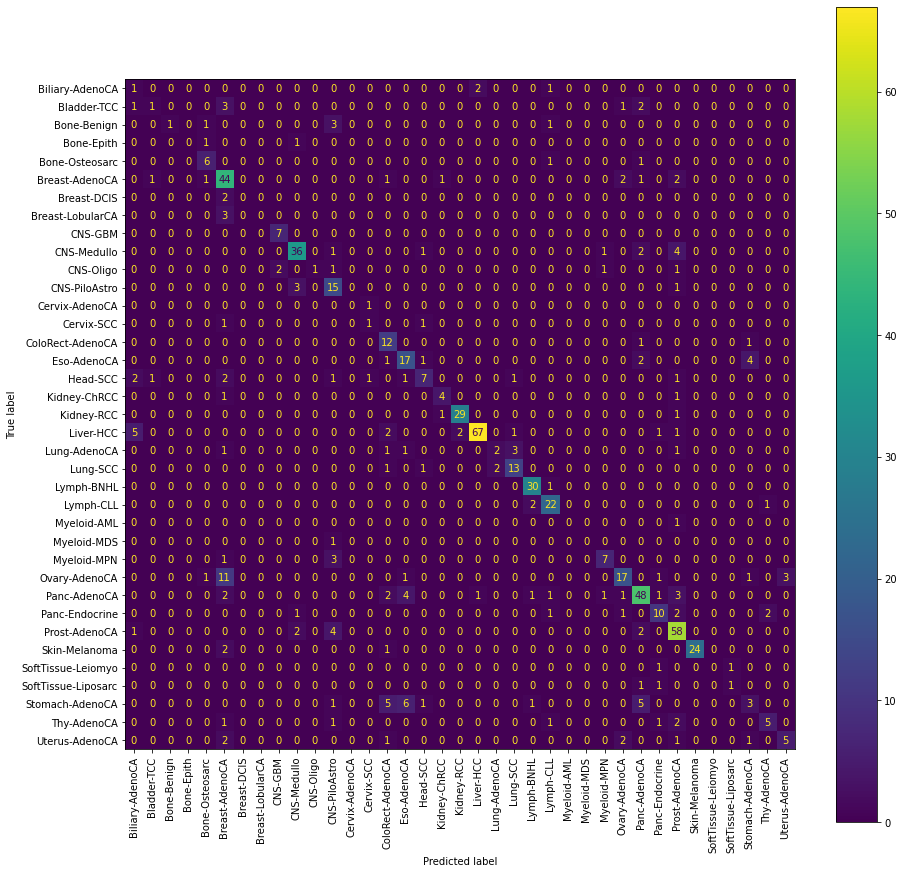

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format = 'd', xticks_rotation = 'vertical', ax=ax)
plt.show()

In [22]:
#fp = false positives, fn = false negatives, tp = true positives, tn = true negatives

#True counts
#function returns the counts of each cancer in alphabetical order
def sorted_counts(data):
    uniques = []
    count_dict = dict()
    for i in data:
        if i not in uniques:
            uniques.append(i)
            count_dict[i] = 1
        else:
            count_dict[i] += 1

    counts_sorted = {key: value for key, value in 
                    sorted(count_dict.items())}
    return counts_sorted

true_dict = sorted_counts(y_test)

#Defining quality parameters
cf = confusion_matrix(y_test, clf_svm.predict(X_test_scaled)).T
predicted_values = []
fp_values = []
for i in range(len(cf)):
    predicted_values.append(cf[i][i])
    fp_values.append(np.sum(cf[i]))
tp_dict = dict()
fp_dict = dict()
fn_dict = dict()
totals_dict = dict()
counter = 0
for key in true_dict.keys():
    fn_dict[key] = true_dict[key] - predicted_values[counter]
    tp_dict[key] = predicted_values[counter]
    fp_dict[key] = fp_values[counter] - predicted_values[counter]
    totals_dict[key] = fp_values[counter]
    counter+=1
    
#precision, recall and accuracy methods:
def accuracy(tp_dict, totals_dict):
    a_dict = dict()
    for key in tp_dict.keys():
        a_dict[key] = round((tp_dict[key]/totals_dict[key]) *100, 1)
    return a_dict

def precision(tp_dict, fp_dict):
    a_dict = dict()
    for key in tp_dict.keys():
        a_dict[key] = round((tp_dict[key] / (tp_dict[key] + fp_dict[key]))*100, 1)
    return a_dict

def recall(tp_dict, fn_dict):
    a_dict = dict()
    for key in tp_dict.keys():
        a_dict[key] = round((tp_dict[key]/(tp_dict[key] + fn_dict[key]))*100, 1)
    return a_dict

#Quality metrics:
#Model accuracy, recall and precision and the F1 measure
model_accuracy = accuracy(tp_dict, totals_dict) #runtimeerror
model_precision = precision(tp_dict, fp_dict) #runtimeerror
model_recall = recall(tp_dict, fn_dict)
F1_dict = dict() # value between 0 and 1
for key in true_dict.keys():
    F1_dict[key] = (2 * (model_precision[key] * model_recall[key]) / (model_precision[key] + model_recall[key]))/100


#testing ground
#print(true_dict) #correct liver-hcc 79 <- relevant elements
#print()
#print(fp_dict) #correct liver-hcc 3 <- missclasifications
#print()
#print(tp_dict) #correct liver-hcc 67 <- found relevant elements
#print()
#print(fn_dict) #correct liver-hcc 12 <-unfound relevant items (true_dict-tp_dict)
#print()
#print(totals_dict) #total amount of predictions per sample (tp + fp)

#def sortValue(dictionary):
#    return dict(sorted(dictionary.items(), key=lambda item: item[1]))
#model_precision = sortValue(precision(tp_dict, fp_dict))
#model_recall = sortValue(recall(tp_dict, fn_dict))
#model_accuracy = sortValue(accuracy(true_dict, tp_dict))

#model mean accuracy = 0.71 but results say 77,5? <- nan values
total = 0
keys = []
for key in model_accuracy.keys():
    if 'CNS-' in key:
        keys.append(key)
        total += model_accuracy[key]
print(total / len(keys))

77.475


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in long_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in long_scalars


In [23]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    clf_svm, X_test_scaled, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")
# optional recall vs precision plot, maybe we can make this work?

AttributeError: type object 'PrecisionRecallDisplay' has no attribute 'from_estimator'

Pricipal componen analysis

In [24]:
len(PCAWG_wgs_mut_T.columns)

97

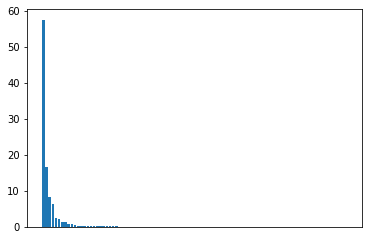

In [25]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var) +1)]

plt.bar(x = range(1,len(per_var)+1), height= per_var)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False)
plt.show()

In [26]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = [{ 'C':[1, 10, 100, 1000], 
               'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'] },
             ]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring='accuracy',
    verbose = 0
)
optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [36]:
clf_svm = SVC(random_state=42, C=1000, gamma = 1)
clf_svm.fit(pca_train_scaled, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min() -1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() -1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start = x_min, stop = x_max, step = 0.1), 
                    np.arange(start = y_min, stop= y_max, step=0.1))

In [47]:
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

In [48]:
ax.contourf(xx, yy, Z, alpha = 0.1)
cmap =  colors.ListedColormap(['#e41a1c', '#4daf4a'])
plt.figure(figsize=(15, 15))
plt.scatter(test_pc1_coords, test_pc2_coords,  c=[x for x in range(len(y_train))], cmap=cmap, s=100, edgecolors='k', alpha=0.7)
plt.show()

ValueError: could not convert string to float: 'Eso-AdenoCA'

In [31]:
#Central nervous system subgroup
sample_group = ('CNS-GBM','CNS-Medullo','CNS-Oligo','CNS-PiloAstro')
keys = []
CX = X.copy()
for key in CX.T.keys():
    for sample in sample_group:
        if sample in key:
            keys.append(key)
CX = CX.loc[[key for key in keys]]
CY = y.copy()
CY = CY.loc[[key for key in keys]]
scaled_CX = scale(CX)
CX_train_scaled, CX_test_scaled, CY_train, CY_test = train_test_split(scaled_CX,CY, random_state=42)

In [33]:
clf_svm = SVC(random_state=42, C=1, gamma = 'scale', kernel='linear')
clf_svm.fit(CX_train_scaled, CY_train)
clf_svm.score(CX_test_scaled, CY_test) #Return the mean accuracy on the given test data and labels.

0.9054054054054054

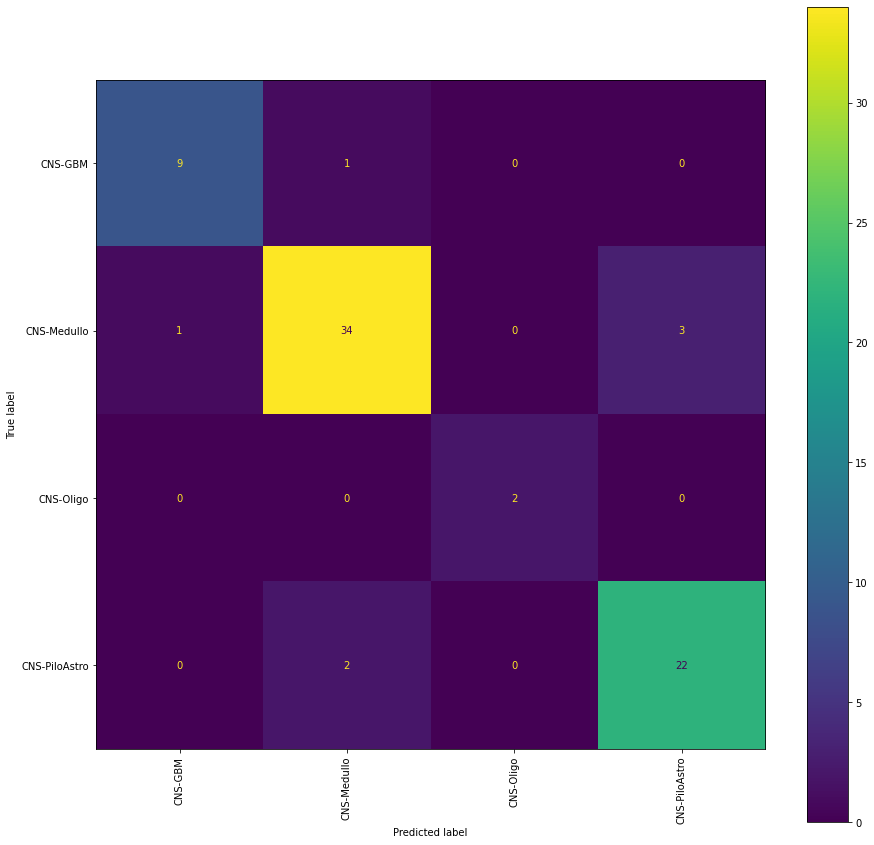

In [34]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(clf_svm, CX_test_scaled, CY_test, values_format = 'd', xticks_rotation = 'vertical', ax=ax)
plt.show()